In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Merge workout data to a single dataframe with route names.

In [2]:
path = "./trailruns/"
files = [file for file in os.listdir(path)]

# df for routes
routes = pd.DataFrame()
# we can save a list of route_names for later
route_names = []

for file in files:
    tmp = pd.read_csv(path + file)
    # find and store route name
    name = file.split("-")[2].split(".")[0]
    route_names.append(name)
    # df gets a new column with that route name
    tmp["Route"] = name
    # concat workout to all routes df 
    routes = pd.concat([routes, tmp])

Remove the "Summary" rows. They get their own object for later analysis.

In [3]:
# do something with route summary down the line..
summary = routes[routes["Split"] == "Summary"]
routes = routes[routes["Split"] != "Summary"]

Make a plot of average stride length for each workout.

In [4]:
# for each workout name, we want to have a different df to plot
# so let's put the df for each route in a list
runs = []
for name in route_names:
    runs.append(routes[routes["Route"] == name])

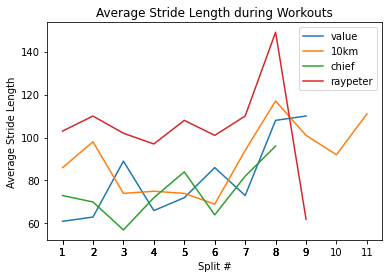

In [5]:
# plot each asl vs split
for i in range(len(route_names)):
    plt.plot(runs[i]["Split"], runs[i]["Avg Stride Length"], label=route_names[i])

plt.xticks(routes["Split"])
plt.xlabel("Split #")
plt.ylabel("Average Stride Length")
plt.legend()
plt.title("Average Stride Length during Workouts")
plt.show()